## **Top 5 Most Demanded Data Analyst Skills Overtime Trend for Data Analysts in United States**

### **Purpose**
- Identifying the overtime trends of likelihood percentage of top 5 most demandd data analyst skills to appear on data analysts jobs requirements in United States.
- Identifying the overtime trends of total counts of top 5 most demand data analyst skills to appear on data analysts jobs requirements in United States.

### **Method**
- Import libraries and load the dataset
- Clean and filter the dataset
- Aggregate the total counts of top 5 most demanded skills per month
- Aggregate the percentage of the likelihood of top 5 most demanded skills per month
- Plot the result

### **1. Import Libraries and Load The Datasets**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [ ]:
df = pd.read_csv(r'C:\Users\harto\OneDrive\Dokumen\DATA ANALYST PORTOFOLIO PROJECT\5. Data Jobs Analyis Using Python\dataset\data_jobs.csv')
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


### **2. Clean and Filter The Dataset**

In [ ]:
# Change the data type into datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 

In [ ]:
# Change data type into list
def str_to_list(column) :
    if pd.notna(column) :
        return ast.literal_eval(column)
    
df['job_skills'] = df['job_skills'].apply(str_to_list) 

In [ ]:
# Filter the data just for data analyst job and United States only
df_filtered = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')][['job_title_short', 'job_posted_date', 'job_skills']].copy()

# Extract the month of job posted date
df_filtered['job_posted_month'] = df_filtered['job_posted_date'].dt.month
df_filtered

,job_title_short,job_posted_date,job_skills,job_posted_month
36,Data Analyst,2023-11-06 13:01:22,None,11
68,Data Analyst,2023-03-24 13:01:00,"[r, zoom]",3
73,Data Analyst,2023-06-16 13:18:22,"[word, excel, powerpoint, outlook]",6
79,Data Analyst,2023-08-07 13:18:27,"[sas, sas, word, excel]",8
93,Data Analyst,2023-06-10 13:00:05,"[oracle, azure, power bi, excel, word, powerpo...",6
...,...,...,...,...
785603,Data Analyst,2023-09-12 06:00:50,"[sql, vba, python, excel, flow]",9
785626,Data Analyst,2023-10-29 06:01:29,[microsoft teams],10
785685,Data Analyst,2023-07-16 06:01:27,"[sql, excel]",7
785703,Data Analyst,2023-01-28 06:02:55,None,1


In [ ]:
# Explode the job skills list
df_explode = df_filtered.explode('job_skills') 

In [7]:
df_explode

,job_title_short,job_posted_date,job_skills,job_posted_month
36,Data Analyst,2023-11-06 13:01:22,None,11
68,Data Analyst,2023-03-24 13:01:00,r,3
68,Data Analyst,2023-03-24 13:01:00,zoom,3
73,Data Analyst,2023-06-16 13:18:22,word,6
73,Data Analyst,2023-06-16 13:18:22,excel,6
...,...,...,...,...
785685,Data Analyst,2023-07-16 06:01:27,excel,7
785703,Data Analyst,2023-01-28 06:02:55,None,1
785705,Data Analyst,2023-01-09 06:00:25,sql,1
785705,Data Analyst,2023-01-09 06:00:25,python,1


### **5. Aggregate The Total Counts of Top 5 Most Demanded Skills per Month**

In [ ]:
# Aggregate the total counts of each skills
df_pivot = df_explode.pivot_table(index = 'job_posted_month', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

In [ ]:
# Get top 5 most demanded skills
top_5_skills = df_explode['job_skills'].value_counts().sort_values(ascending = False).head(5).index 
top_5_skills

Index(['sql', 'excel', 'tableau', 'python', 'sas'], dtype='object', name='job_skills')

In [ ]:
# Filter the aggregated table by top 5 most demanded skills
df_plot = df_pivot.loc[:, top_5_skills] 
df_plot

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
1,4601,3592,2488,2254,1832
2,3168,2587,1676,1618,1212
3,3226,2661,1804,1683,1238
4,3220,2549,1789,1679,1302
5,2581,2118,1432,1349,972
6,2862,2382,1628,1609,984
7,2609,2118,1533,1438,996
8,3414,2731,1951,2025,1276
9,2295,1801,1353,1229,856


In [ ]:
# Change the month number into month name abbreviation
df_plot.reset_index(inplace = True)
month_name = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

df_plot['job_posted_month'] = df_plot['job_posted_month'].map(month_name)

df_plot.set_index(keys = 'job_posted_month', inplace = True)

df_plot

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,4601,3592,2488,2254,1832
Feb,3168,2587,1676,1618,1212
Mar,3226,2661,1804,1683,1238
Apr,3220,2549,1789,1679,1302
May,2581,2118,1432,1349,972
Jun,2862,2382,1628,1609,984
Jul,2609,2118,1533,1438,996
Aug,3414,2731,1951,2025,1276
Sep,2295,1801,1353,1229,856


### **6. Plot The Result**

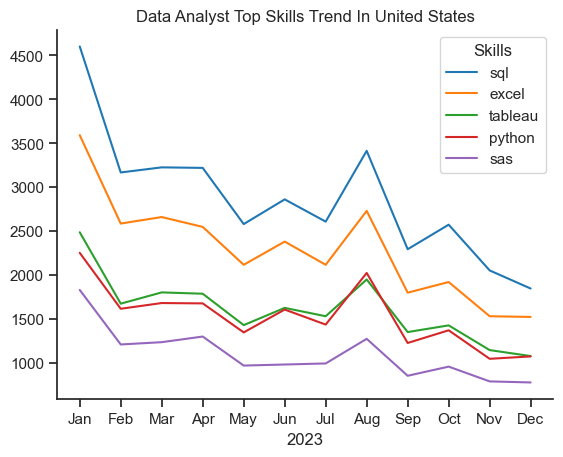

In [12]:
sns.set_theme(style='ticks')

sns.lineplot(data = df_plot, dashes = False, legend = 'full', palette = 'tab10')
sns.despine()

plt.title('Data Analyst Top Skills Trend In United States')
plt.xlabel('2023')
plt.ylabel('')
plt.legend(title = 'Skills')
plt.show()

### **7. Aggregate The Percentage of The Likelihood of Top 5 Most Demanded Skills per Month**

In [ ]:
# Retrieve the total counts of data analyst jobs in US for each month
df_total = df_filtered['job_posted_month'].value_counts().sort_index() 
df_total


job_posted_month
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
Name: count, dtype: int64

In [ ]:
# Calculate the percentage
df_pivot_percent = df_pivot.div(df_total/100, axis = 0)
df_pivot_percent

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,0.459148,0.082411,2.425241,0.247233,0.082411,0.011773,0.000000,0.176595,0.200141,0.000000,...,0.082411,0.105957,0.941841,0.035319,11.396280,0.000000,0.082411,0.000000,0.000000,0.353190
2,0.571522,0.000000,3.314827,0.375572,0.065317,0.016329,0.000000,0.228609,0.146963,0.000000,...,0.097975,0.097975,1.502286,0.048988,12.050947,0.048988,0.000000,0.000000,0.000000,0.310255
3,0.627211,0.016082,3.522033,0.080412,0.080412,0.096494,0.016082,0.225153,0.176906,0.000000,...,0.112576,0.096494,1.222258,0.080412,11.836603,0.016082,0.016082,0.016082,0.000000,0.257317
4,0.462886,0.016532,3.438585,0.132253,0.049595,0.115722,0.049595,0.082658,0.099190,0.000000,...,0.033063,0.066127,1.421723,0.148785,11.489502,0.132253,0.016532,0.000000,0.000000,0.198380
5,0.540757,0.060084,2.884038,0.300421,0.160224,0.180252,0.020028,0.100140,0.260365,0.000000,...,0.020028,0.120168,1.341879,0.020028,11.155618,0.060084,0.000000,0.000000,0.000000,0.180252
6,0.686257,0.087982,3.308112,0.158367,0.070385,0.140771,0.052789,0.123174,0.123174,0.000000,...,0.087982,0.035193,1.214147,0.140771,12.686961,0.087982,0.000000,0.000000,0.000000,0.351927
7,0.807537,0.038454,3.076331,0.096135,0.057681,0.096135,0.096135,0.115362,0.038454,0.000000,...,0.076908,0.019227,1.134397,0.192271,11.286291,0.000000,0.000000,0.000000,0.019227,0.249952
8,0.663250,0.030148,2.818812,0.075369,0.045222,0.150739,0.000000,0.075369,0.045222,0.000000,...,0.045222,0.090443,1.311426,0.060295,11.335544,0.000000,0.000000,0.000000,0.000000,0.391920
9,0.474240,0.064669,3.125674,0.237120,0.043113,0.064669,0.086225,0.086225,0.064669,0.000000,...,0.000000,0.086225,1.724510,0.086225,10.303945,0.000000,0.000000,0.000000,0.021556,0.258676


In [ ]:
# Filter the aggregated table by top 5 most demanded skills
df_plot_percent = df_pivot_percent[:][top_5_skills]
df_plot_percent.reset_index(inplace = True)

# Change the month number into month name
df_plot_percent['job_posted_month'] = df_plot_percent['job_posted_month'].map(month_name) 
df_plot_percent.set_index(keys = 'job_posted_month', inplace = True)
df_plot_percent


job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


### **8. Plot The Result**

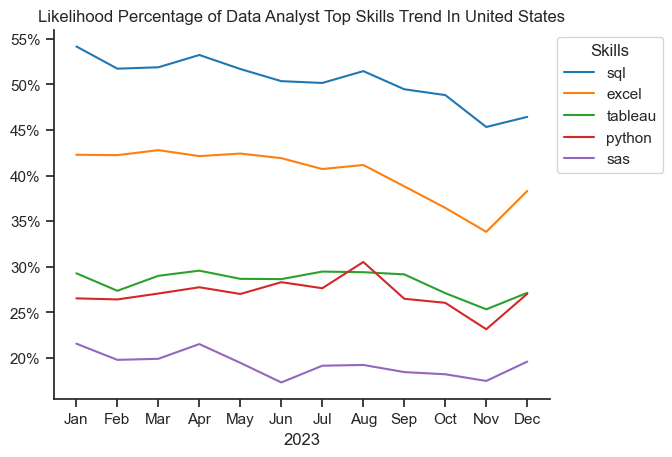

In [16]:
sns.set_theme(style = 'ticks')

sns.lineplot(data = df_plot_percent, dashes = False, legend = 'full', palette = 'tab10')
sns.despine()

plt.title('Likelihood Percentage of Data Analyst Top Skills Trend In United States')
plt.xlabel('2023')
plt.ylabel('')
plt.legend(title = 'Skills', bbox_to_anchor=(1, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'{int(x)}%'))
plt.show()